In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from utils_result_analysis import get_df, plot_metric

In [2]:
def get_test_result_dataframes(dataset, csv_filename):
    result_csv_types = ["_best_f1_state", "_best_eod_state", "_best_loss_state"]
    new_csv_filenames = []
    for result_csv_type in result_csv_types:
        csv_files = f"../../benchmark_test_results/{dataset}/{csv_filename}{result_csv_type}.csv"
        new_csv_filenames.append(csv_files)
        
    return pd.read_csv(new_csv_filenames[0]), pd.read_csv(new_csv_filenames[1]), pd.read_csv(new_csv_filenames[2])

In [3]:
utk_f1, utk_eod, utk_loss = get_test_result_dataframes("utk_face", "v003_target_age_19")
utk_augmentation_f1, utk_augmentation_eod, utk_augmentation_loss = get_test_result_dataframes("utk_face", "v003_target_age_19_data_augmentation")
fair_face_f1, fair_face_eod, fair_face_loss = get_test_result_dataframes("fair_face", "v2_target_gender")
lfw_f1, lfw_eod, lfw_loss = get_test_result_dataframes("lfw", "v2_target_smiling")
celeba_f1, celeba_eod, celeba_loss = get_test_result_dataframes("celeba", "v001_final")

lfw_Strong_nose_f1, lfw_Strong_nose_eod, lfw_Strong_nose_loss = get_test_result_dataframes("lfw", "v2_target_strong_nose")
lfw_big_nose_f1, lfw_big_nose_eod, lfw_big_nose_loss = get_test_result_dataframes("lfw", "v001_target_big_nose")
lfw_wearing_lipstick_f1, lfw_wearing_lipstick_eod, lfw_wearing_lipstick_loss = get_test_result_dataframes("lfw", "v2_target_wearing_lipstick")

In [110]:
print(lfw_f1)

    test_acc   test_f1  test_precision  test_auc  test_eod   test_dp  \
0   0.739222  0.735079        0.830262  0.747809  0.308578  0.278135   
1   0.743026  0.738607        0.835603  0.751774  0.333744  0.289208   
2   0.729079  0.719475        0.832827  0.739394  0.331693  0.290661   
3   0.697380  0.683746        0.801242  0.708263  0.022235  0.026841   
4   0.729079  0.725951        0.815562  0.737154  0.283518  0.242012   
5   0.741336  0.738908        0.827916  0.749320  0.318412  0.274560   
6   0.742181  0.737069        0.836595  0.751169  0.293457  0.266627   
7   0.741758  0.739446        0.828080  0.749706  0.289100  0.255176   
8   0.737532  0.733133        0.828960  0.746185  0.311687  0.295717   
9   0.718090  0.701299        0.837433  0.730457  0.331715  0.288773   
10  0.740723  0.730867        0.840326  0.749899  0.324016  0.282725   

    test_TPR  test_TNR  test_FPR  test_FNR  test_MCC  \
0   0.659476  0.836142  0.163858  0.340524  0.497394   
1   0.661787  0.841760 

In [4]:
def create_comparison_table(df_map):
    #dfs = {'UTK Face': df_utk, 'Fair Face': df_fair_face, "LFW": df_lfw}
    metrics = ['test_f1', 'test_eod']
    
    # Create table for each metric
    for metric in metrics:
        # DataFrame for current metric
        metric_df = pd.DataFrame(columns=['Approach'])
        first_key = list(df_map.keys())[0]
        metric_df['Approach'] = df_map[first_key]["name"]
        
        # Add column for each dataset
        for dataset_name, df in df_map.items():
            if "UTK" in dataset_name  and metric == "test_eod":
                metric_df[dataset_name] = df["test_eod_max"]
            else:
                print(metric)
                print(dataset_name)
                metric_df[dataset_name] = df[metric]
        
        print(f"Table for Metric: {metric}")
        print(metric_df.to_string(index=False))
        print("\n")

In [115]:
dfs = {'CelebA': celeba_f1, 'UTK Face': utk_f1, 'Fair Face': fair_face_f1, "LFW": lfw_f1, "UTK Augmented": utk_augmentation_f1}
create_comparison_table(dfs)

test_f1
CelebA
test_f1
UTK Face
test_f1
Fair Face
test_f1
LFW
test_f1
UTK Augmented
Table for Metric: test_f1
                  Approach   CelebA  UTK Face  Fair Face      LFW  UTK Augmented
           Image Sketching 0.922977  0.482436   0.875330 0.735079       0.846745
     Adversarial Debiasing 0.744777  0.514191   0.851519 0.738607       0.828706
                 BASE Loss 0.802918  0.421494   0.873853 0.719475       0.830880
   Blackbox Postprocessing 0.731925  0.342447   0.823695 0.683746       0.603190
        Domain Independent 0.868282  0.528791   0.870140 0.725951       0.845589
  Entangling Disentangling 0.804979  0.616840   0.879498 0.738908       0.845285
      Feature Distillation 0.870790  0.440269   0.878003 0.737069       0.850585
Orthogonal Representations 0.620038  0.241428   0.877094 0.739446       0.618669
Adversarial Shared Encoder 0.929002  0.688298   0.914797 0.733133       0.848214
      Contrastive Training 0.918916  0.825110   0.911270 0.701299       0.823330

In [7]:
dfs = {'Strong Nose-Mouth Lines': lfw_Strong_nose_f1, 'Smiling': lfw_f1, 'Big Nose': lfw_big_nose_f1, "Wearing Lipstick": lfw_wearing_lipstick_f1}
print("Test")
create_comparison_table(dfs)


Test
test_f1
Strong Nose-Mouth Lines
test_f1
Smiling
test_f1
Big Nose
test_f1
Wearing Lipstick
Table for Metric: test_f1
                  Approach  Strong Nose-Mouth Lines  Smiling  Big Nose  Wearing Lipstick
           Image Sketching                 0.872129 0.735079  0.802676          0.820051
     Adversarial Debiasing                 0.873250 0.738607  0.784728          0.742382
                 BASE Loss                 0.873891 0.719475  0.812971          0.805298
   Blackbox Postprocessing                 0.865479 0.683746  0.815003          0.252632
        Domain Independent                 0.873832 0.725951  0.813842          0.704110
  Entangling Disentangling                 0.877736 0.738908  0.813380          0.799476
      Feature Distillation                 0.876352 0.737069  0.808174          0.771357
Orthogonal Representations                 0.868610 0.739446  0.813363          0.801047
Adversarial Shared Encoder                 0.886232 0.733133  0.859367        

# Validation data training progress

In [4]:
def get_all_dfs(dataset_name, version, baseline_version=None):
    if baseline_version is None:
        df_baseline = get_df("plain_baseline", dataset_name, version, "Baseline")
        pass
    else:
        df_baseline = get_df("plain_baseline", dataset_name, baseline_version, "Baseline")

    df_sketch = get_df("image_sketching", dataset_name, version, "Image Sketching")
    df_adv = get_df("adversarial_debiasing", dataset_name, version, "Adversarial Debiasing")
    df_base = get_df("base_loss_optimization", dataset_name, version, "BASE Loss")
    df_domain = get_df("domain_independent_learning", dataset_name, version, "Domain Independent Training")
    df_ent = get_df("entangling_disentangling", dataset_name, version, "Entangling Disentangling")
    df_contras = get_df("fair_contrastive", dataset_name, version + "_classifier", "Contrastive Learning")
    df_feat_dist = get_df("fair_feat_distill", dataset_name, version, "Feature Distillation")
    df_orth = get_df("orthogonal_representations", dataset_name, version + "_target", "Orthogonal Representations")
    df_shared_adv_encoder = get_df("shared_adv_encoder", dataset_name, version, "Adversarial Shared Encoder")

    return [df_baseline, df_sketch, df_adv, df_base, df_domain, df_ent, df_contras, df_feat_dist, df_orth,
            df_shared_adv_encoder]

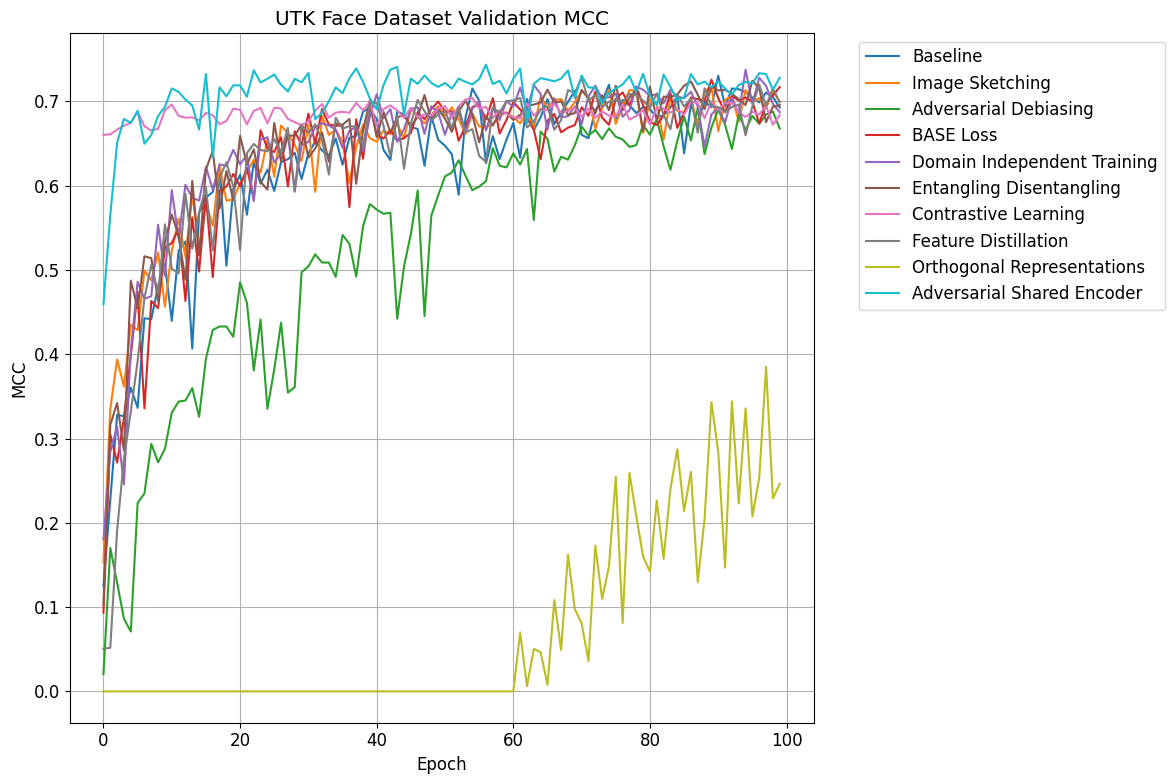

In [24]:
utk_metrics = get_all_dfs("utk_face", "v003_target_age_19_data_augmentation", "v003_target_age_19_data_augmentation")
plot_metric(utk_metrics, "valid_MCC", title="UTK Face Dataset Validation MCC", y_label="MCC", save_fig_path="utk_face_validation_mcc.png")

In [116]:
def create_all_validation_plots(dataset_metrics, dataset_name, path_name, smoothing_factor=0):
    if dataset_name == "UTK Face" or dataset_name == "UTK Face Data Augmentation":
        plot_metric(dataset_metrics, "valid_eod_max", title=f"{dataset_name} Dataset Validation Max EOD", y_label="Max EOD Score", save_fig_path=f"{path_name}_validation_eod_max_score.png", smoothing_factor=smoothing_factor)
        plot_metric(dataset_metrics, "valid_eod_mean", title=f"{dataset_name} Dataset Validation Mean EOD", y_label="Mean EOD Score", save_fig_path=f"{path_name}_validation_eod_mean_score.png", smoothing_factor=smoothing_factor)
        plot_metric(dataset_metrics, "valid_eod_strict", title=f"{dataset_name} Dataset Validation Strict EOD", y_label="Strict EOD Score", save_fig_path=f"{path_name}_validation_eod_strict_score.png", smoothing_factor=smoothing_factor)
        plot_metric(dataset_metrics, "valid_dp_max", title=f"{dataset_name} Dataset Validation Max DP", y_label="Max DP Score", save_fig_path=f"{path_name}_validation_dp_max_score.png", smoothing_factor=smoothing_factor)
        plot_metric(dataset_metrics, "valid_dp_mean", title=f"{dataset_name} Dataset Validation Mean DP", y_label="Mean DP Score", save_fig_path=f"{path_name}_validation_dp_mean_score.png", smoothing_factor=smoothing_factor)
    else:
        plot_metric(dataset_metrics, "valid_eod", title=f"{dataset_name} Dataset Validation EOD", y_label="EOD Score", save_fig_path=f"{path_name}_validation_eod_score.png", smoothing_factor=smoothing_factor)
        plot_metric(dataset_metrics, "valid_dp", title=f"{dataset_name} Dataset Validation DP", y_label="DP Score", save_fig_path=f"{path_name}_validation_dp_score.png", smoothing_factor=smoothing_factor)
    
    plot_metric(dataset_metrics, "valid_MCC", title=f"{dataset_name} Dataset Validation MCC", y_label="MCC", save_fig_path=f"{path_name}_validation_mcc.png")
    
    plot_metric(dataset_metrics, "valid_f1", title=f"{dataset_name} Dataset Validation F1 Score", y_label="F1 Score", save_fig_path=f"{path_name}_validation_f1_score.png")
    
    plot_metric(dataset_metrics, "valid_acc", title=f"{dataset_name} Dataset Validation Accuracy", y_label="Accuracy", save_fig_path=f"{path_name}_validation_accuracy.png")
    
    plot_metric(dataset_metrics, "valid_auc", title=f"{dataset_name} Dataset Validation AUC", y_label="AUC Score", save_fig_path=f"{path_name}_validation_auc.png")

In [117]:
def create_all_train_plots(dataset_metrics, dataset_name, path_name, smoothing_factor=0):
    if dataset_name == "UTK Face" or dataset_name == "UTK Face Data Augmentation":
        plot_metric(dataset_metrics, "train_eod_max", title=f"{dataset_name} Dataset Training Max EOD", y_label="Max EOD Score", save_fig_path=f"{path_name}_train_eod_max_score.png", smoothing_factor=smoothing_factor)
        plot_metric(dataset_metrics, "train_eod_mean", title=f"{dataset_name} Dataset Training Mean EOD", y_label="Mean EOD Score", save_fig_path=f"{path_name}_train_eod_mean_score.png", smoothing_factor=smoothing_factor)
        plot_metric(dataset_metrics, "train_eod_strict", title=f"{dataset_name} Dataset Training Strict EOD", y_label="Strict EOD Score", save_fig_path=f"{path_name}_train_eod_strict_score.png", smoothing_factor=smoothing_factor)
        plot_metric(dataset_metrics, "train_dp_max", title=f"{dataset_name} Dataset Training Max DP", y_label="Max DP Score", save_fig_path=f"{path_name}_train_dp_max_score.png", smoothing_factor=smoothing_factor)
        plot_metric(dataset_metrics, "train_dp_mean", title=f"{dataset_name} Dataset Training Mean DP", y_label="Mean DP Score", save_fig_path=f"{path_name}_train_dp_mean_score.png", smoothing_factor=smoothing_factor)
    else:
        plot_metric(dataset_metrics, "train_eod", title=f"{dataset_name} Dataset Training EOD", y_label="EOD Score", save_fig_path=f"{path_name}_train_eod_score.png", smoothing_factor=smoothing_factor)
        plot_metric(dataset_metrics, "train_dp", title=f"{dataset_name} Dataset Training DP", y_label="DP Score", save_fig_path=f"{path_name}_train_dp_score.png", smoothing_factor=smoothing_factor)
     
    plot_metric(dataset_metrics, "train_f1", title=f"{dataset_name} Dataset Training F1 Score", y_label="F1 Score", save_fig_path=f"{path_name}_train_f1_score.png")
    
    plot_metric(dataset_metrics, "train_acc", title=f"{dataset_name} Dataset Training Accuracy", y_label="Accuracy", save_fig_path=f"{path_name}_train_accuracy.png")

In [ ]:
metrics_df = get_all_dfs("utk_face", "v003_target_age_19_data_augmentation", "v003_target_age_19_data_augmentation")
create_all_validation_plots(metrics_df, "UTK Face", "utk_face", smoothing_factor=0.8)

In [ ]:
metrics_df = get_all_dfs("lfw", "v2_target_wearing_lipstick", "v2_target_wearing_lipstick")
create_all_validation_plots(metrics_df, "LFW (Target Wearing Lipstick)", "lfw_target_wearing_lipstick", smoothing_factor=0.6)

In [97]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_model_test_results(df, save_fig_path, title, fontsize=14):
    df = df.sort_values(by='test_f1', ascending=False)

    models = df['name']
    f1_scores = df['test_f1']
    if "UTK" in title:
        eod_values = df['test_eod_max']
    else:
        eod_values = df['test_eod']

    x = range(len(models)) 

    fig, ax = plt.subplots(figsize=(18, 8))

    ax.bar(x, f1_scores, width=0.4, label='F1', align='center')
    ax.bar([p + 0.4 for p in x], eod_values, width=0.4, label='EOD', align='center')
    
    if 'Baseline' in models.values:
        baseline_index = df.index[df['name'] == 'Baseline'].tolist()[0]
        baseline_f1 = f1_scores[baseline_index]
        baseline_eod = eod_values[baseline_index]
        ax.axhline(y=baseline_f1, color='blue', linestyle='--', linewidth=1.5, label='Baseline F1', zorder=0)
        ax.axhline(y=baseline_eod, color='orange', linestyle='--', linewidth=1.5, label='Baseline EOD', zorder=0)


    ax.set_xlabel('Mitigation Approach', fontsize=fontsize)
    ax.set_ylabel('Score', fontsize=fontsize)
    ax.set_title(title, fontsize=fontsize)
    ax.set_xticks([p + 0.2 for p in x])
    ax.set_xticklabels(models, rotation=45, fontsize=fontsize)

    plt.legend(fontsize=fontsize)
    plt.grid(axis='y')
    plt.tight_layout()
    
    plt.savefig(f"../dataset_plots/{save_fig_path}.png", dpi=250)
    plt.show()

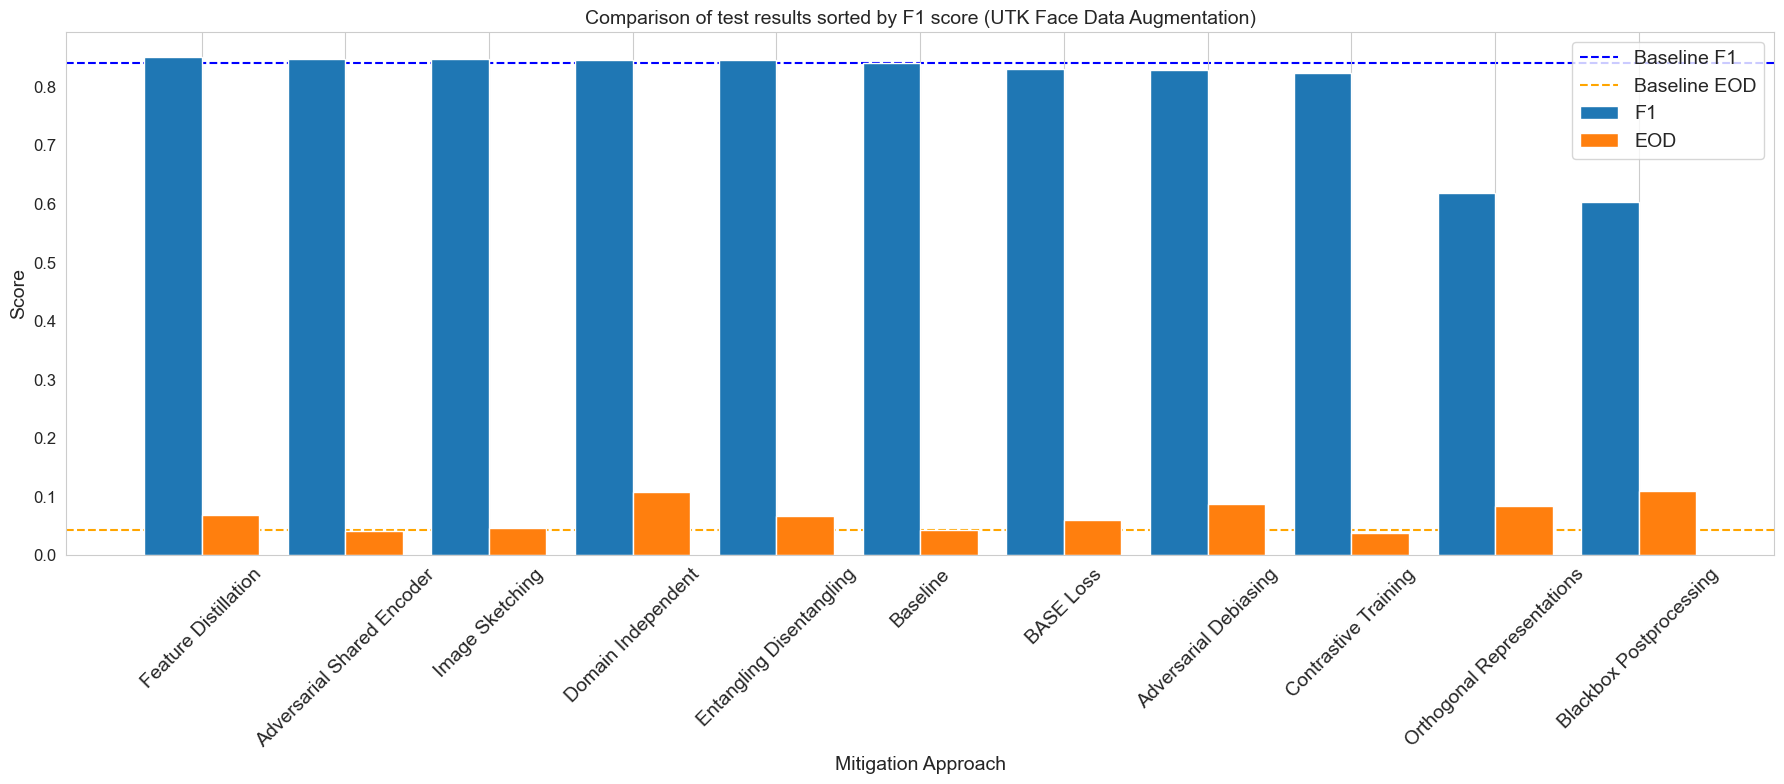

In [118]:
plot_model_test_results(utk_augmentation_f1, 'utk_augmentation_f1_test_results', 'Comparison of test results sorted by F1 score (UTK Face Data Augmentation)')

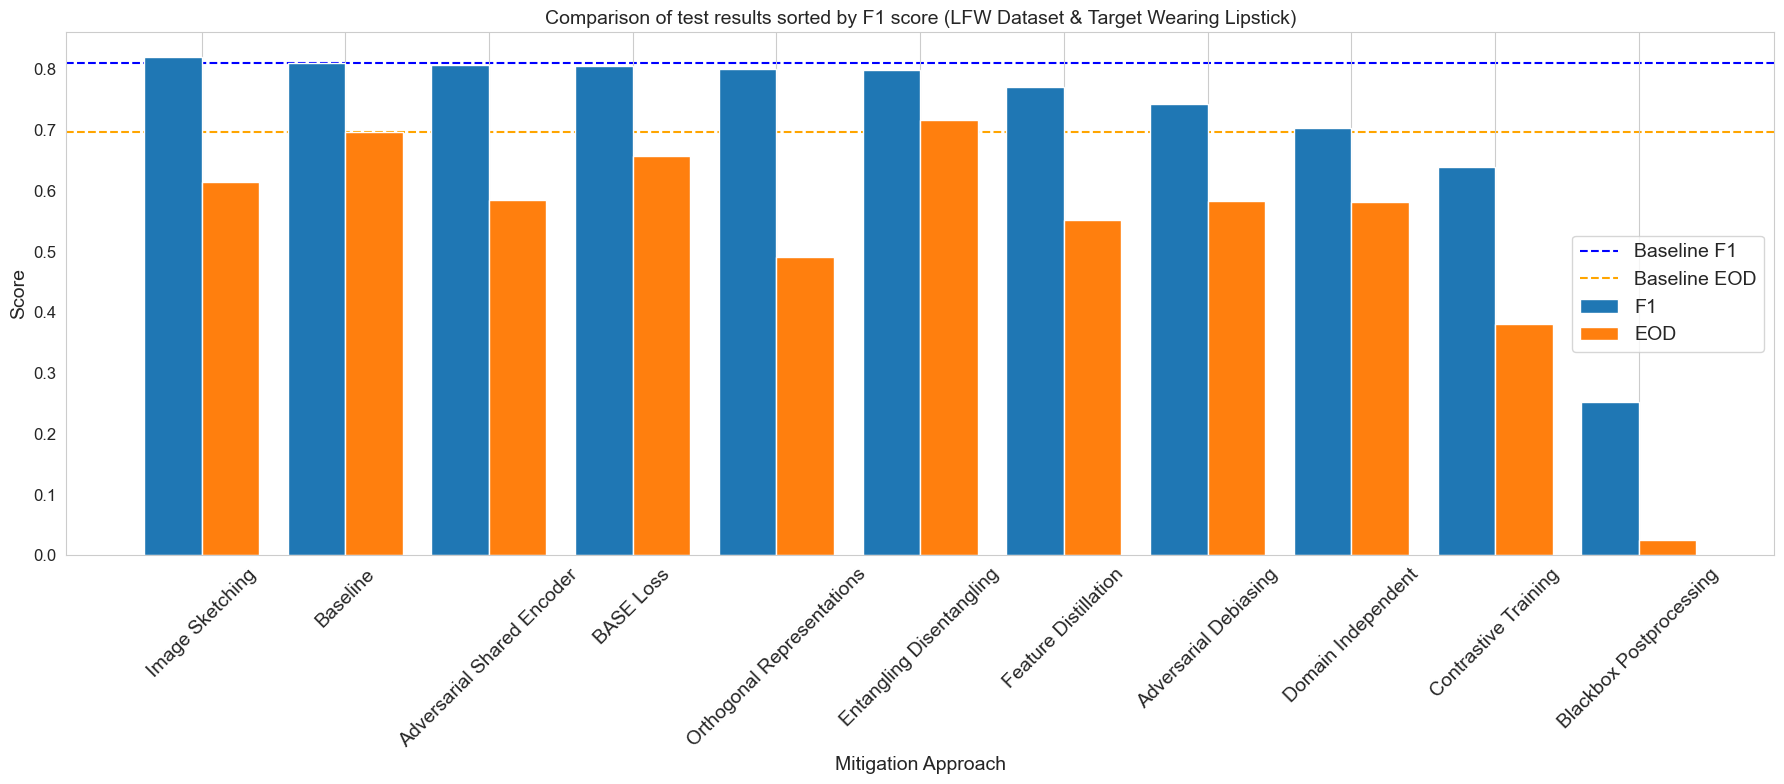

In [101]:
plot_model_test_results(lfw_wearing_lipstick_f1, 'lfw_wearing_lipstick_f1_test_results', 'Comparison of test results sorted by F1 score (LFW Dataset & Target Wearing Lipstick)')

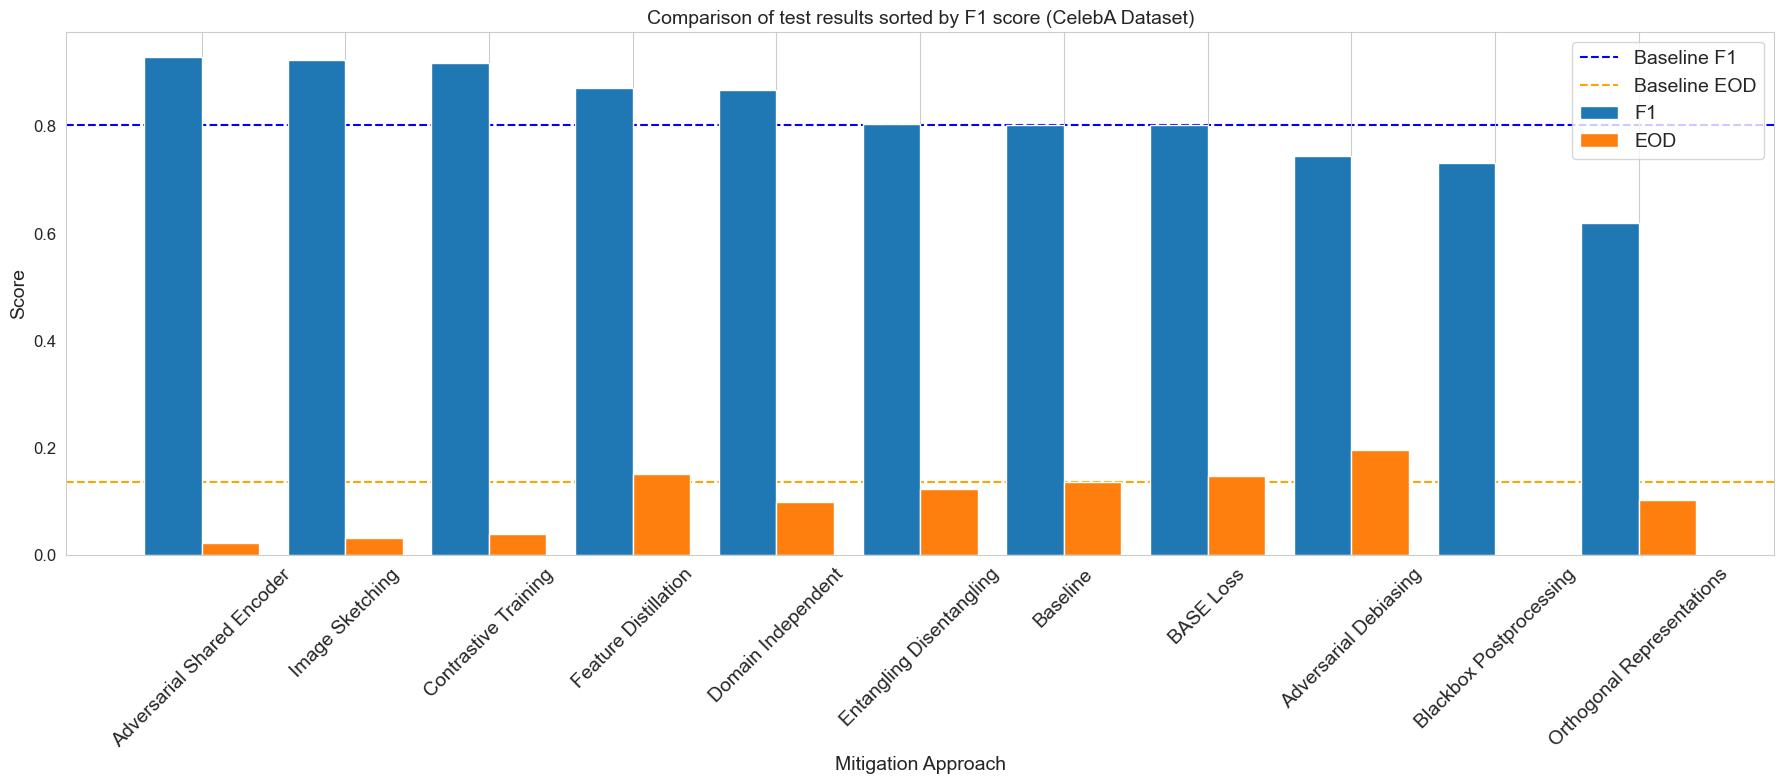

In [102]:
plot_model_test_results(celeba_f1, 'celeba_f1_test_results', 'Comparison of test results sorted by F1 score (CelebA Dataset)')

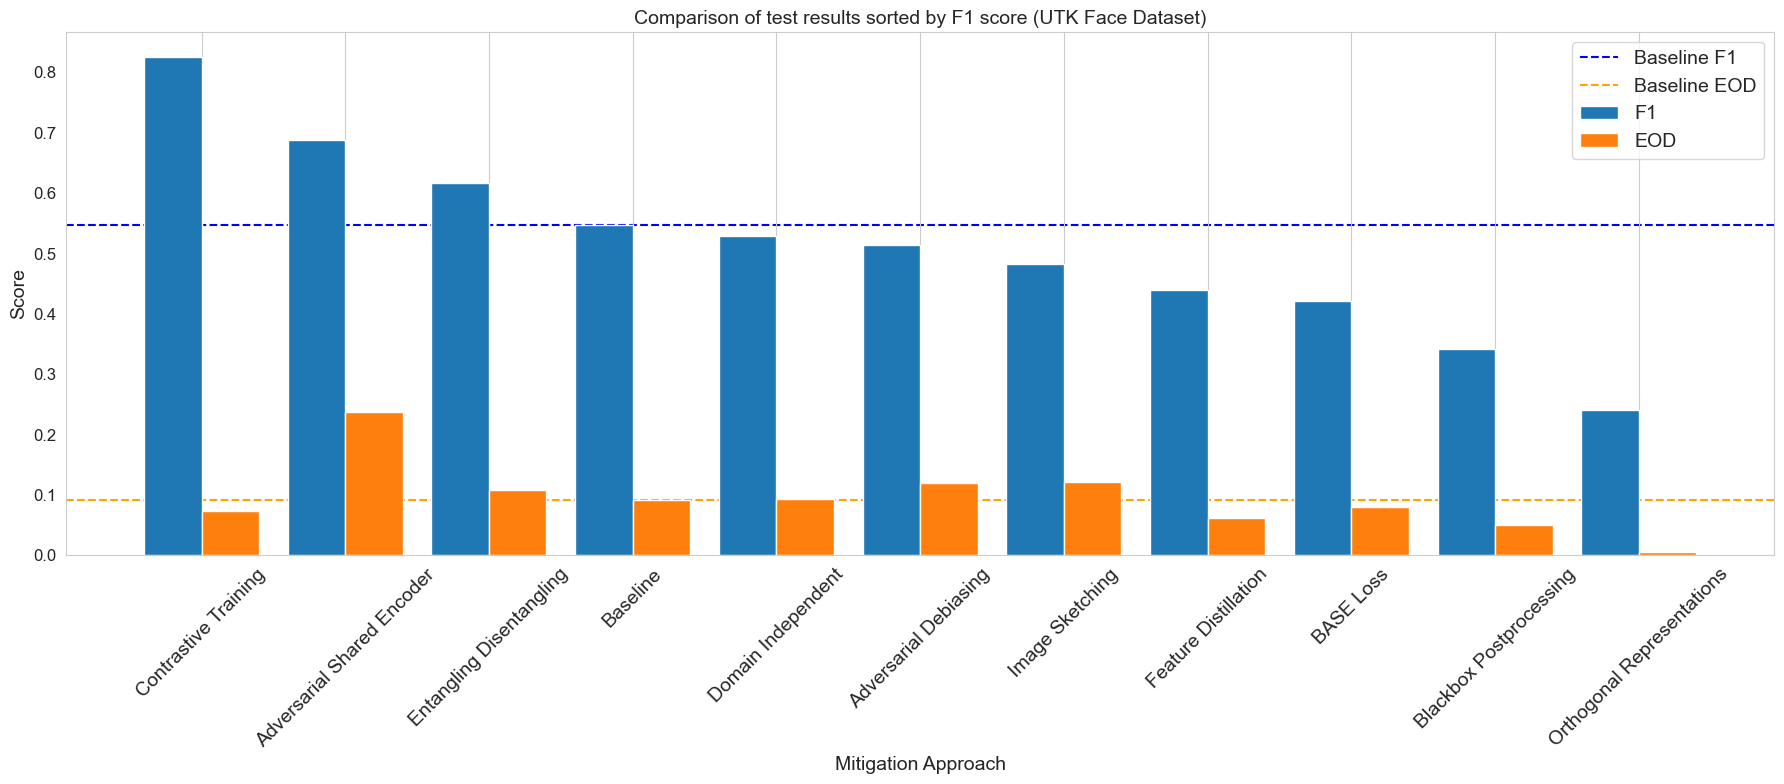

In [103]:
plot_model_test_results(utk_f1, 'utk_f1_test_results', 'Comparison of test results sorted by F1 score (UTK Face Dataset)')

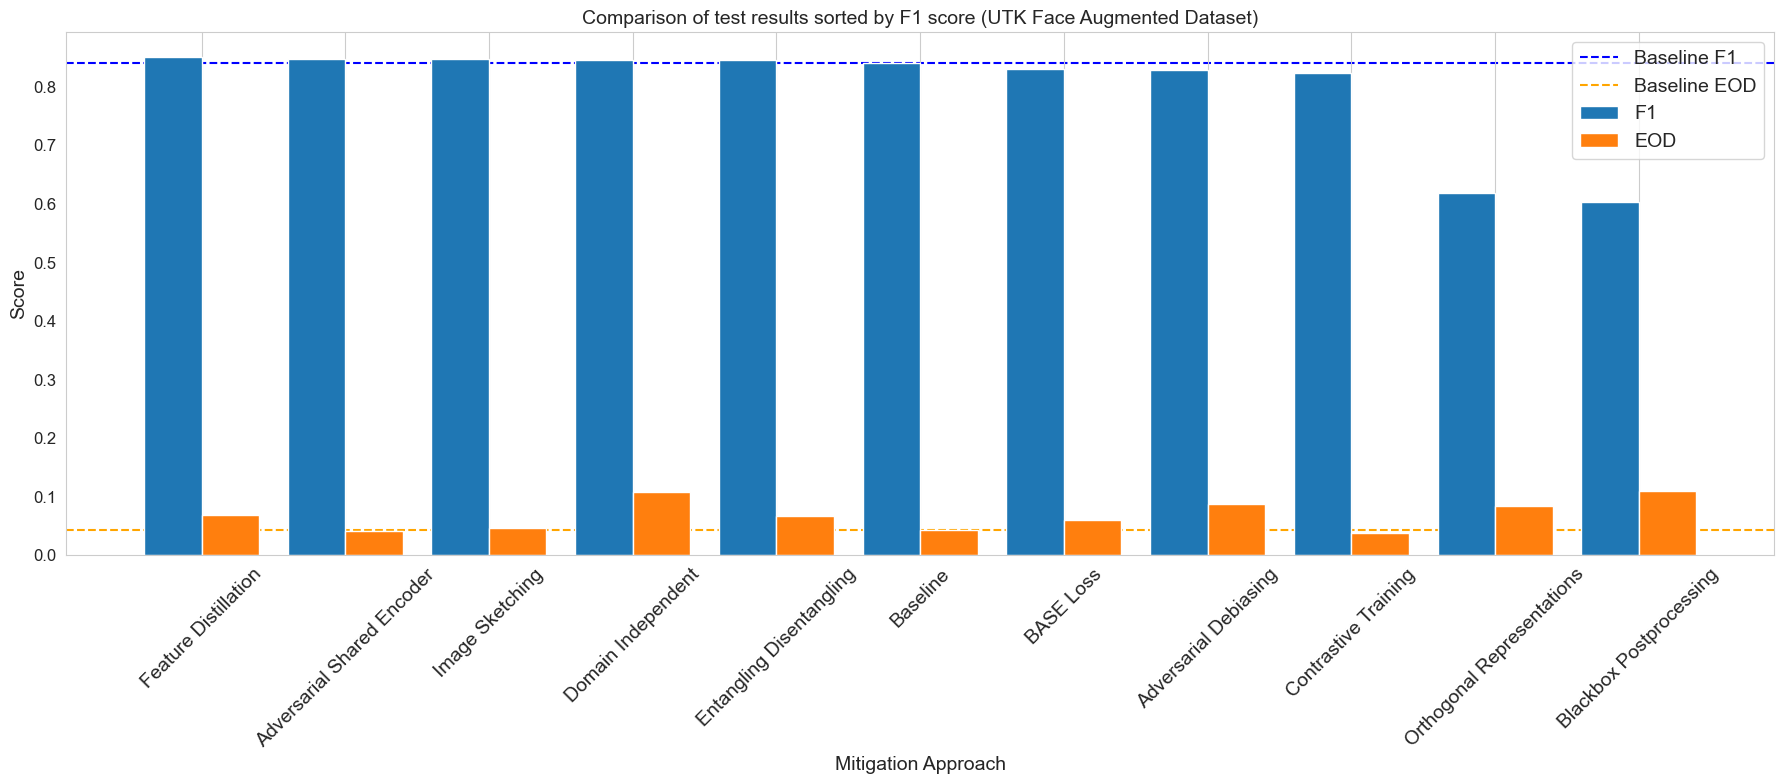

In [105]:
plot_model_test_results(utk_augmentation_f1, 'utk_augmentation_f1_test_results', 'Comparison of test results sorted by F1 score (UTK Face Augmented Dataset)')

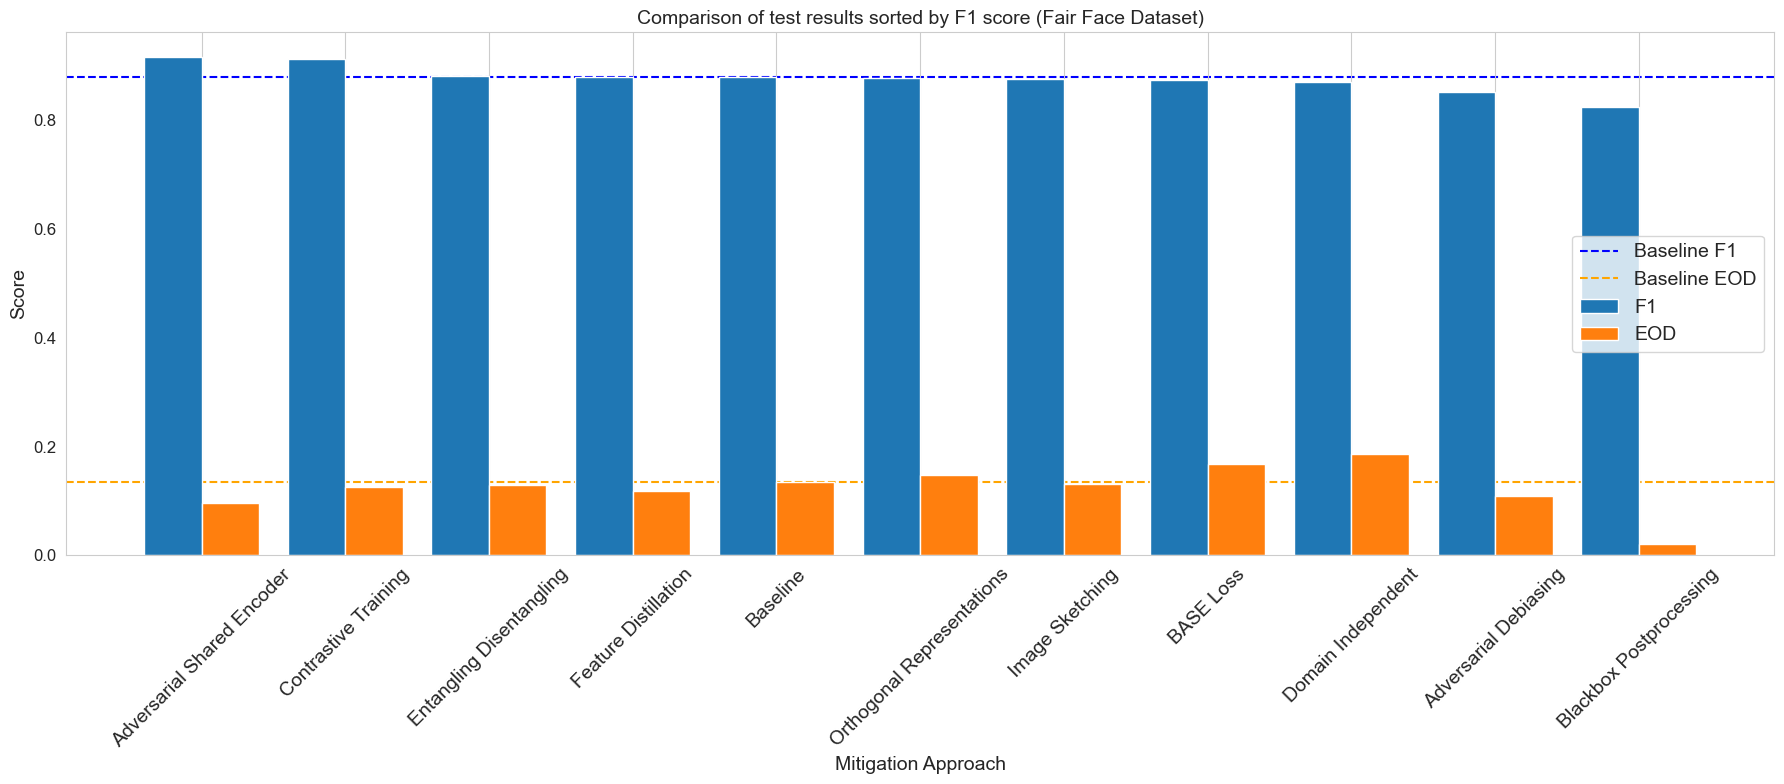

In [104]:
plot_model_test_results(fair_face_f1, 'fair_facef1_test_results', 'Comparison of test results sorted by F1 score (Fair Face Dataset)')